<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/2models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [21]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [22]:
# Listing the directories in the path in a list

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_train', 'asl_alphabet_test']


In [23]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['W', 'J', 'Z', 'Y', 'I', 'A', 'D', 'N', 'C', 'nothing', 'H', 'U', 'R', 'S', 'T', 'V', 'E', 'M', 'P', 'space', 'G', 'L', 'del', 'F', 'B', 'O', 'K', 'X', 'Q']
Total classes: 29


In [24]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['E_test.jpg', 'nothing_test.jpg', 'V_test.jpg', 'F_test.jpg', 'P_test.jpg', 'G_test.jpg', 'T_test.jpg', 'C_test.jpg', 'J_test.jpg', 'X_test.jpg', 'B_test.jpg', 'S_test.jpg', 'Z_test.jpg', 'R_test.jpg', 'I_test.jpg', 'Q_test.jpg', 'N_test.jpg', 'W_test.jpg', 'L_test.jpg', 'K_test.jpg', 'D_test.jpg', 'U_test.jpg', 'space_test.jpg', 'H_test.jpg', 'A_test.jpg', 'M_test.jpg', 'Y_test.jpg', 'O_test.jpg']
Total classes: 28


/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/space/space1207.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/U/U2211.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/B/B1908.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/Y/Y1975.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/N/N1147.jpg


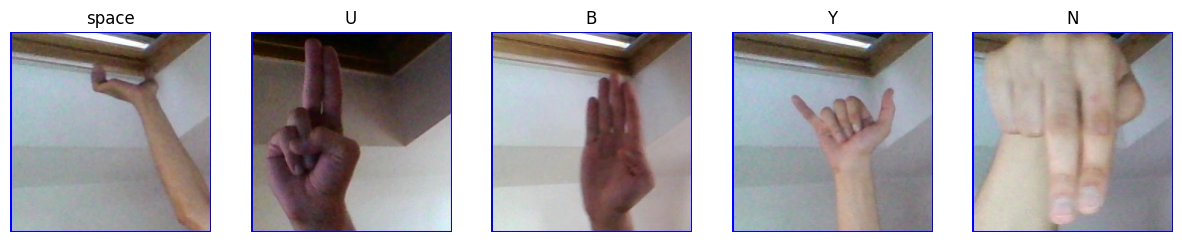

In [25]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [26]:

# Define paths
input_dir = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [02:03<00:00,  4.26s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [27]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['W', 'J', 'Z', 'Y', 'I', 'A', 'D', 'N', 'C', 'nothing', 'H', 'U', 'R', 'S', 'T', 'V', 'E', 'M', 'P', 'space', 'G', 'L', 'del', 'F', 'B', 'O', 'K', 'X', 'Q']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/H/H970.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/S/S2492.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/S/S1211.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/O/O1986.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/nothing/nothing563.jpg


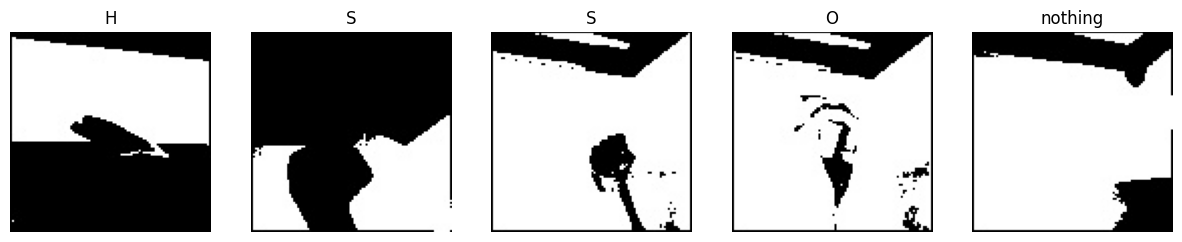

In [28]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
IMG_SIZE = 50  # Image size (50x50)
NUM_CLASSES = 29  # ASL Alphabet (26 letters + space, delete, nothing)

# Load dataset
X, y = [], []
label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(dataset_path)))}

for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):  # Ensure it's a directory
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixels to [0,1]
            X.append(img_array)
            y.append(label_map[label])  # Assign numeric label

# Convert to numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape to (samples, 50, 50, 1)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, NUM_CLASSES)

# Split into train and test sets (70-30 for lower accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset loaded! X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Define CNN model with **2 extra layers**
def build_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),  # Layer 1
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(32, (3,3), activation='relu'),  # Layer 2
        MaxPooling2D((2,2)),
        Dropout(0.4),



        Flatten(),
        Dense(128, activation='relu'),  # Increased Dense neurons
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Higher LR
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train model
model = build_model()
model.summary()  # Display model architecture

# Train the model
EPOCHS = 15  # Reduced epochs (from 8 to 5)
BATCH_SIZE = 32  # Increased batch size (was 16)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

# Save the trained model
model.save("sign_language_cnn_2extra_layers.h5")

print("Model training complete and saved as 'sign_language_cnn_2extra_layers.h5' 🎉")


Dataset loaded! X_train shape: (60900, 50, 50, 1), y_train shape: (60900, 29)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_609 (Conv2D)                  │ (None, 48, 48, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_610 (Conv2D)                  │ (None, 22, 22, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,285 (1.92 MB)

 Trainable params: 504,285 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 124s 64ms/step - accuracy: 0.3142 - loss: 2.2278 - val_accuracy: 0.8057 - val_loss: 0.6704
Epoch 2/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 138s 62ms/step - accuracy: 0.6067 - loss: 1.1460 - val_accuracy: 0.8597 - val_loss: 0.5343
Epoch 3/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 117s 62ms/step - accuracy: 0.6638 - loss: 0.9832 - val_accuracy: 0.8676 - val_loss: 0.4454
Epoch 4/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 151s 66ms/step - accuracy: 0.6827 - loss: 0.9254 - val_accuracy: 0.8957 - val_loss: 0.3202
Epoch 5/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 118s 62ms/step - accuracy: 0.7010 - loss: 0.8805 - val_accuracy: 0.8929 - val_loss: 0.3570
Epoch 6/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.7104 - loss: 0.8479 - val_accuracy: 0.8999 - val_loss: 0.3242
Epoch 7/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 150s 66ms/step - accuracy: 0.7209 - loss: 0.8197 - val_accuracy: 0.9076 - val_loss: 0.3125
Epoch 8/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 

Model training complete and saved as 'sign_language_cnn_2extra_layers.h5' 🎉


In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
IMG_SIZE = 150
NUM_CLASSES = 29
BATCH_SIZE = 8

# Aggressive data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    validation_split=0.3
)

# Load dataset dynamically
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Reduce dataset size to control accuracy
train_generator.samples = int(train_generator.samples * 0.75)  # Reduce to slow learning

# Load Pretrained MobileNetV2 (simpler model)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add classifier head with Extreme Dropout & L2 Regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.02))(x)  # Reduce layer complexity
x = Dropout(0.6)(x)  # High dropout
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile model with low learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train model for 10 epochs
EPOCHS = 10
model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Save model
model.save("sign_language_mobilenetv2_75_accuracy_10epochs.h5")

print("Model training complete and saved as 'sign_language_mobilenetv2_75_accuracy_10epochs.h5' 🎉")


Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


<ipython-input-12-5d5250d2e78a>:48: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7613/7613 ━━━━━━━━━━━━━━━━━━━━ 708s 87ms/step - accuracy: 0.1493 - loss: 6.4881 - val_accuracy: 0.3659 - val_loss: 2.4984
Epoch 2/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 695s 83ms/step - accuracy: 0.4504 - loss: 2.1059 - val_accuracy: 0.4273 - val_loss: 2.3550
Epoch 3/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 629s 83ms/step - accuracy: 0.5380 - loss: 1.7466 - val_accuracy: 0.4598 - val_loss: 2.3205
Epoch 4/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 629s 83ms/step - accuracy: 0.5921 - loss: 1.5517 - val_accuracy: 0.4630 - val_loss: 2.3517
Epoch 5/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 673s 88ms/step - accuracy: 0.6198 - loss: 1.4426 - val_accuracy: 0.4837 - val_loss: 2.3786
Epoch 6/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 636s 84ms/step - accuracy: 0.6454 - loss: 1.3538 - val_accuracy: 0.4953 - val_loss: 2.3361
Epoch 7/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 634s 83ms/step - accuracy: 0.6615 - loss: 1.2996 - val_accuracy: 0.4786 - val_loss: 2.2196
Epoch 8/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 626s 82ms/step - accuracy: 0.6771 - lo

Model training complete and saved as 'sign_language_mobilenetv2_75_accuracy_10epochs.h5' 🎉
